In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker' , 'Bag', 'Ankle boot']

num_classes = len(class_names)

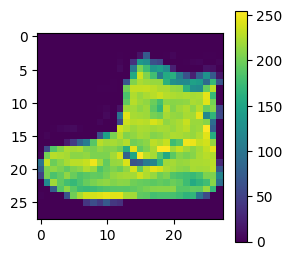

Ankle boot


In [4]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[0]])

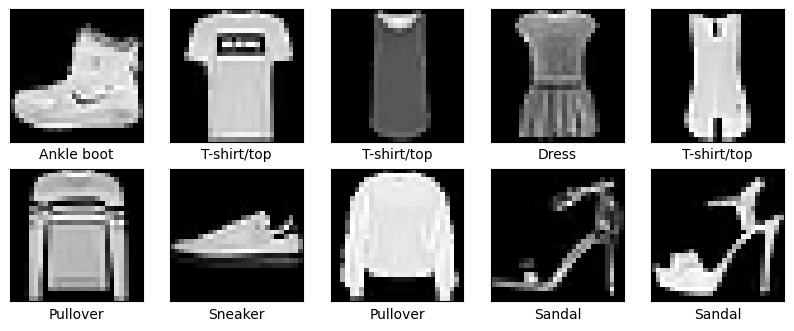

In [5]:
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])


In [6]:
def convert_to_tensor(images):
  return images.reshape(images.shape[0], 28, 28, 1)

train_images = convert_to_tensor(train_images)
test_images = convert_to_tensor(test_images)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
def normalization(images):
  return images.astype('float32') / 255.0
train_images = normalization(train_images)
test_images = normalization(test_images)
print(f'Shape of train images: {train_images.shape}')
print(f'Shape of test images: {test_images.shape}')


Shape of train images: (60000, 28, 28, 1)
Shape of test images: (10000, 28, 28, 1)


In [8]:
# convert the target variable to categorical variable

unique_classes = np.unique(train_labels)
NUM_CLASSES = unique_classes.shape[0]

def to_categorical(labels, num_classes):
  return tf.keras.utils.to_categorical(labels, num_classes)
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') - logs.get('val_accuracy') >= 0.05 and epoch > 10:
      # Stop if threshold is met
      print(f"\nThe difference between train accuracy and validation more than 5% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [10]:
epoch_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='auto', restore_best_weights=False)

In [11]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3)


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',data_format='channels_last', input_shape=(28,28,1)),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),


  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,2

 Total params: 13,017,770 (49.66 MB)

 Trainable params: 13,016,106 (49.65 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [13]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images,
          train_labels,
          validation_data=(test_images, test_labels),
          batch_size=250,
          epochs=25,
          callbacks=[callbacks, reduce_lr, epoch_callback])

Epoch 1/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7626 - loss: 0.7072 - val_accuracy: 0.3062 - val_loss: 2.7502 - learning_rate: 0.0030
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8889 - loss: 0.3083 - val_accuracy: 0.8309 - val_loss: 0.4919 - learning_rate: 0.0030
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9076 - loss: 0.2564 - val_accuracy: 0.9054 - val_loss: 0.2526 - learning_rate: 0.0030
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9188 - loss: 0.2254 - val_accuracy: 0.9112 - val_loss: 0.2409 - learning_rate: 0.0030
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9259 - loss: 0.2083 - val_accuracy: 0.9173 - val_loss: 0.2353 - learning_rate: 0.0030
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9344 - loss: 0.1836 - val_accuracy: 0.9267 - val_loss: 0.2070 - learning_rate: 0.0030
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9379 - loss

In [14]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9432 - loss: 0.2186


[0.22129778563976288, 0.9433000087738037]

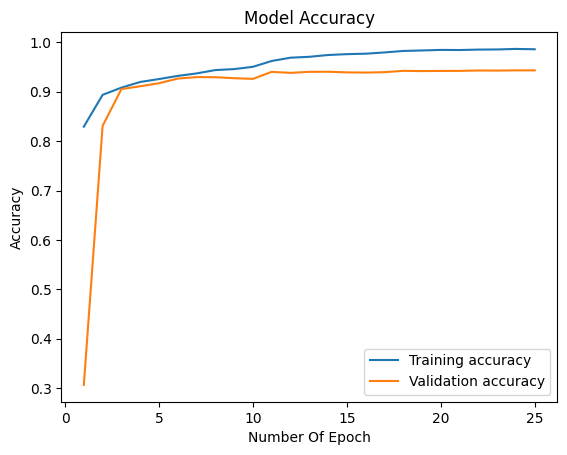

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')
plt.plot(list(range(1, len(val_accuracy) + 1)), val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

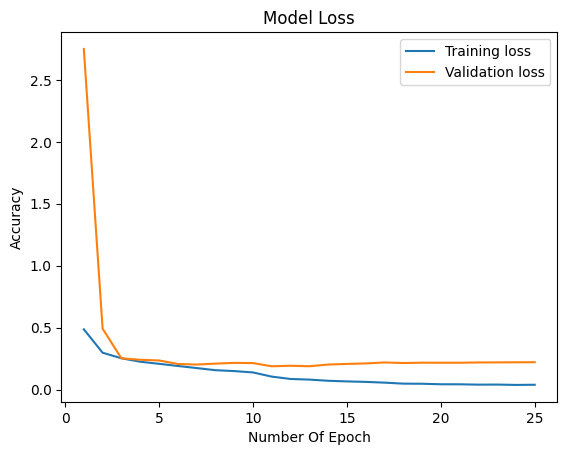

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')
plt.plot(list(range(1, len(val_loss) + 1)), val_loss, label = 'Validation loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


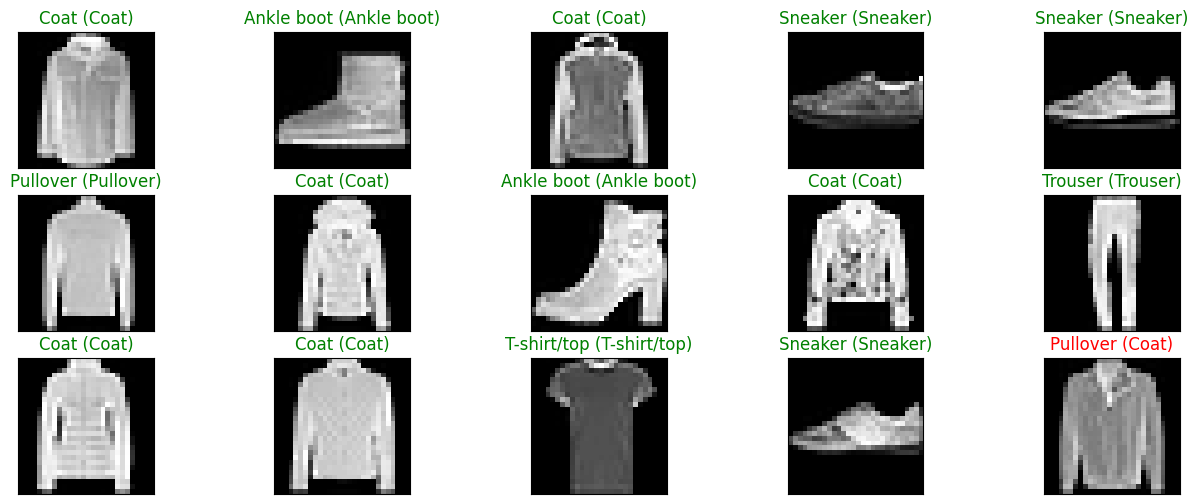

In [17]:
predictions = model.predict(test_images)

figure = plt.figure(figsize=(16, 6))
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)
for i, index in enumerate(display_images):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[index], cmap='gray')
    predict_index = np.argmax(predictions[index])
    #print(f'{predict_index}: {class_names[predict_index]}')
    true_index = np.argmax(test_labels[index])
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [18]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.91      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.92      0.93      0.92      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.90      0.93      0.92      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.86      0.80      0.83      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



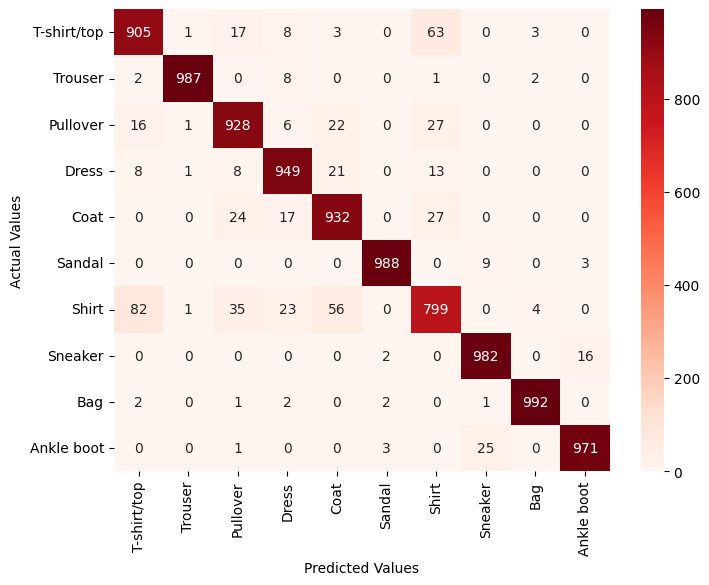

In [19]:
cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Як бачимо CNN модель має точніть на 4% вище за FCNN (з попереднього ДЗ). Згідно результатів Classification Report і Confusion Matrix наша нейромережа добре справилася з розпізнаванням усіх зображень одягу. Найбільшу точність вона показала при розпізнаванні зображень Trouser, Sandal, Sneaker, а найменшу для зображень Shirt(згідно Confusion Matrix можна побачити, що найчастіше наша модель помилково передбачає T-shirt/Top замість Shirt).